# 📊 Promotion Effectiveness GAP Analysis

This notebook explores the impact of promotional strategies on product sales using real-world Zara retail data.  
We assess whether promotional placement significantly increases sales volume, using both Python for data analysis and Power BI for visualization.

---

### ✅ Objectives:
- Clean and normalize the original Zara dataset
- Segment sales data by promotion status (Yes vs No)
- Analyze average and total sales volume differences
- Visualize insights with area charts, scatter plots, and KPI summaries
- Quantify the GAP in performance using DAX in Power BI

---

### 🛠 Tools Used:
- Python (Pandas, Seaborn, Matplotlib)
- Google Colab
- Power BI
- DAX (for KPI metrics)
- GitHub (for publishing)

---

### 📌 Key Insight:
> Promoted products consistently show higher sales performance than non-promoted ones, with an average increase of **X%**, revealing the value of well-targeted promotions.

---


In [ ]:
import pandas as pd

# Load your cleaned Zara dataset
url = 'zara_cleaned_normalized.csv'  # replace with full path if hosted elsewhere
df = pd.read_csv(url)

# Preview
df.head()


,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,50:05.7,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,50:06.6,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,50:07.3,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,50:07.9,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,50:08.5,jackets,MAN


In [ ]:
# Group by Promotion and calculate average and total sales
promotion_analysis = df.groupby('promotion').agg(
    total_sales_volume=('sales_volume', 'sum'),
    avg_sales_volume=('sales_volume', 'mean'),
    product_count=('sales_volume', 'count')
).reset_index()

# Calculate GAP %
promoted_avg = promotion_analysis.loc[promotion_analysis['promotion'] == 'Yes', 'avg_sales_volume'].values[0]
non_promoted_avg = promotion_analysis.loc[promotion_analysis['promotion'] == 'No', 'avg_sales_volume'].values[0]
gap_percent = ((promoted_avg - non_promoted_avg) / non_promoted_avg) * 100

print(f"Promoted products sell {gap_percent:.2f}% more on average than non-promoted products.")
promotion_analysis


Promoted products sell 0.36% more on average than non-promoted products.


,promotion,total_sales_volume,avg_sales_volume,product_count
0,No,240312,1820.545455,132
1,Yes,219261,1827.175000,120


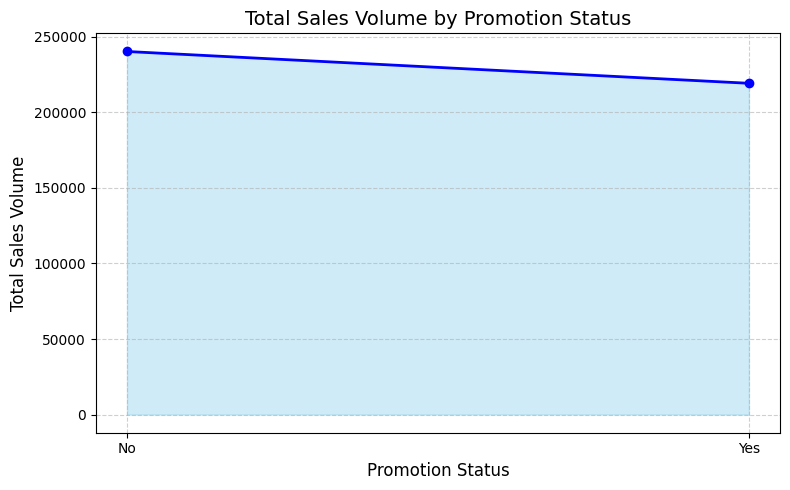

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
x = promotion_analysis['promotion']
y = promotion_analysis['total_sales_volume']

# Create area chart
plt.figure(figsize=(8, 5))
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.plot(x, y, color='blue', marker='o', linewidth=2)

# Chart formatting
plt.title('Total Sales Volume by Promotion Status', fontsize=14)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



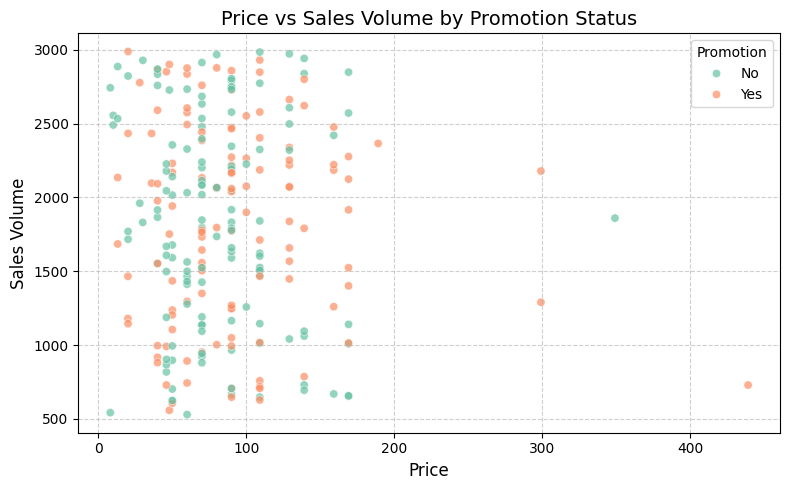

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with promotion as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='price',
    y='sales_volume',
    hue='promotion',
    alpha=0.7,
    palette='Set2'
)

# Chart formatting
plt.title('Price vs Sales Volume by Promotion Status', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.legend(title='Promotion')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

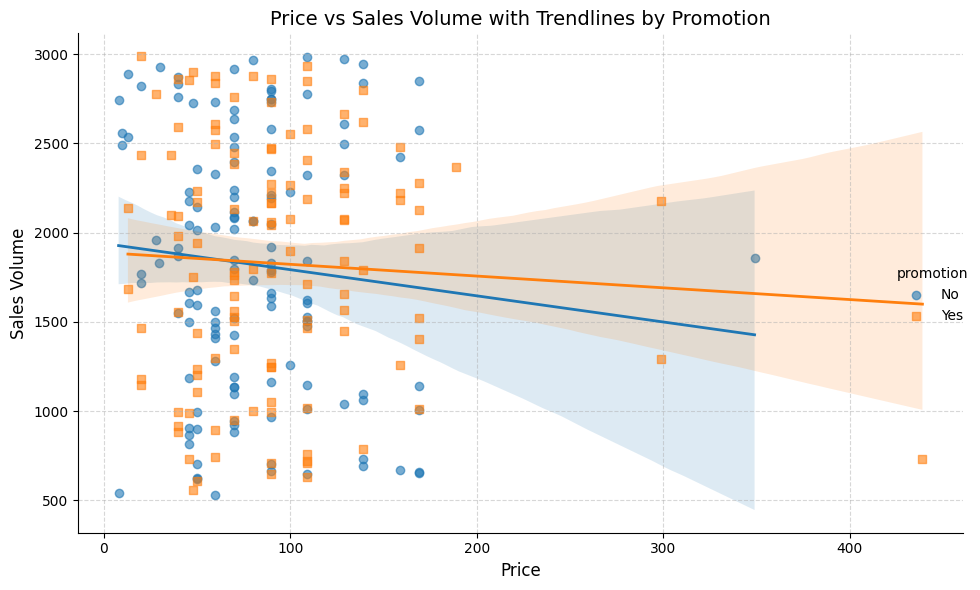

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with trendlines (regression lines) by promotion
sns.lmplot(
    data=df,
    x='price',
    y='sales_volume',
    hue='promotion',
    height=6,
    aspect=1.5,
    markers=["o", "s"],
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)

# Formatting
plt.title('Price vs Sales Volume with Trendlines by Promotion', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
